In [1]:
# Enzyme analysis

In [2]:
# add data
inhibited <- data.frame(
  Substrate = c(1.0, 2.0, 3.0, 4.0, 5.0),
  Inhibitor = c(1.0, 1.0, 1.0, 1.0, 1.0),
  Rate = c(0.05, 0.10, 0.15, 0.16, 0.18)

)

uninhibited <- data.frame(
  Substrate = c(1.0, 2.0, 3.0, 4.0, 5.0),
  Inhibitor = c( 0.0, 0.0, 0.0, 0.0, 0.0),
  Rate = c(0.67, 1.13, 1.48, 1.74, 1.98)
  )

data <- rbind(inhibited, uninhibited)

In [3]:
library(knitr)

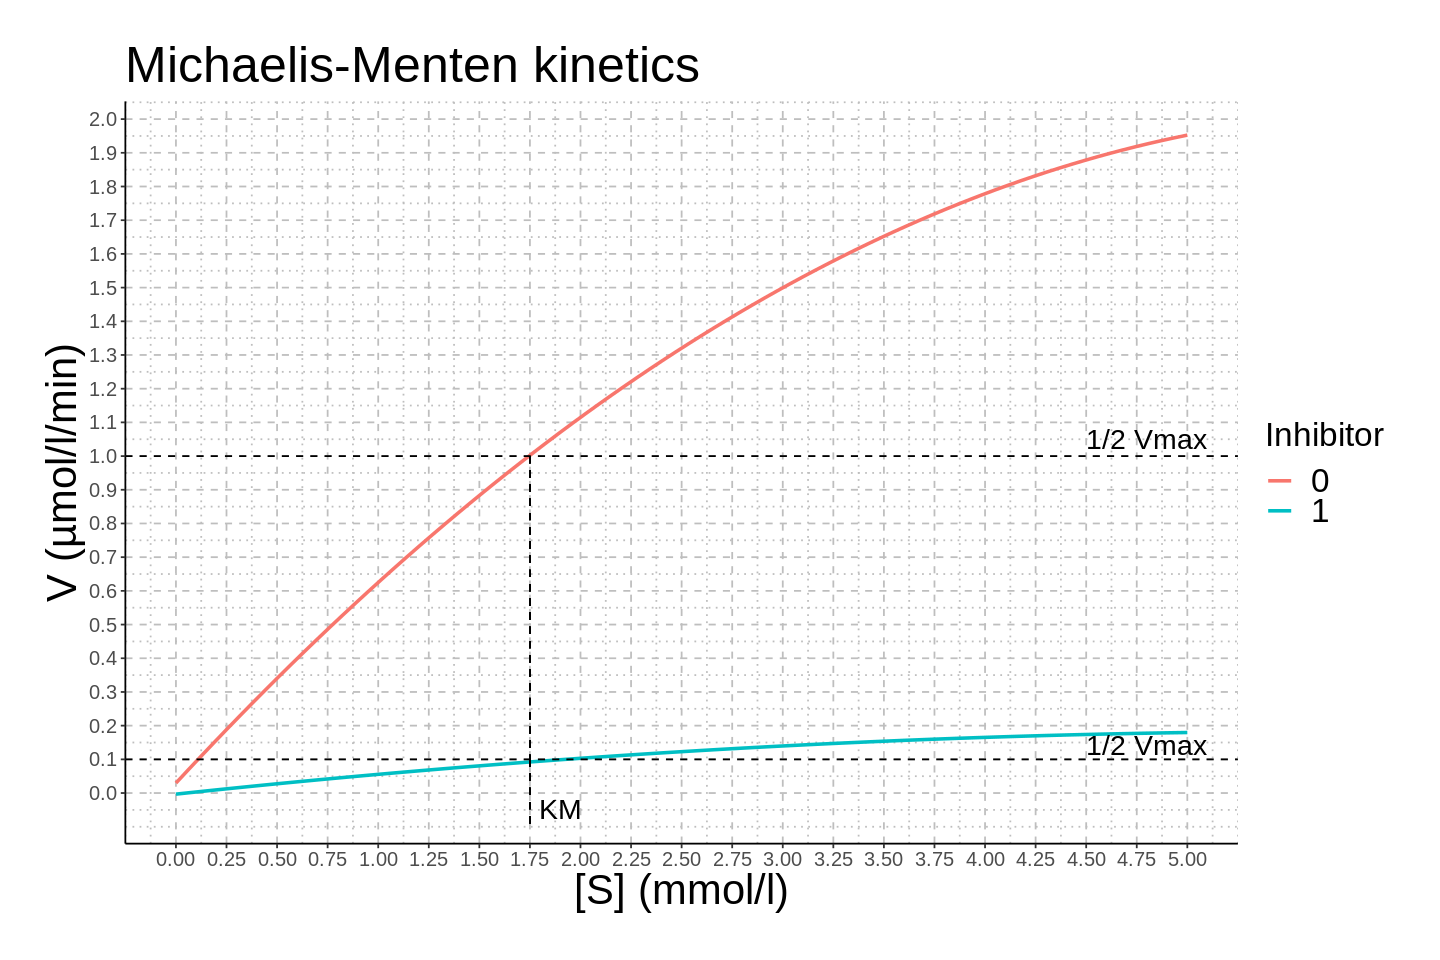

In [4]:

# Visualize the data
library(ggplot2)
options(repr.plot.width=12, repr.plot.height=8)

# add starting position zero to inhibited data and fitted values
inhibited_0 <- rbind(data.frame(Substrate = 0, Inhibitor = 1, Rate = 0), inhibited)
uninhibited_0 <- rbind(data.frame(Substrate = 0, Inhibitor = 0, Rate = 0), uninhibited)

# Combine the data frames
all_data <- rbind(uninhibited_0, inhibited_0)

# Create substrate concentration range
Substrate <- seq(0, 5, length.out = 100)

Vm_guess_inhibited <- 0.2
Vm_guess_uninhibited <- 2

# Plot the data and the fits
ggplot(all_data, aes(x = Substrate, y = Rate, color = factor(Inhibitor))) +
  geom_smooth(method = "lm", se = FALSE, formula = y ~ poly(x, 2)) +
  scale_color_discrete(name = "Inhibitor") +
  labs(x = "[S] (mmol/l)", y = "V (µmol/l/min)") +
  ggtitle("Michaelis-Menten kinetics") +
  theme_classic() +
          # create line 1/2 Vm for two lines
            geom_hline(yintercept = Vm_guess_inhibited/2, linetype = "dashed", color = "black") +
            geom_hline(yintercept = Vm_guess_uninhibited/2, linetype = "dashed", color = "black") +
            # add 1/2 Vm labels at the right side of the plot and higheer than the lines
            annotate("text", x = 4.8, y = Vm_guess_inhibited/2 + 0.04, label = "1/2 Vmax", color = "black", size = 6) +
            annotate("text", x = 4.8, y = Vm_guess_uninhibited/2 + 0.05, label = "1/2 Vmax", color = "black", size = 6) +
            # line from y = 1, x = 1.75 to y = 0, x = 1.75 
            geom_segment(x = 1.75, xend = 1.75, y = 1, yend = 0.1, linetype = "dashed", color = "black") +
            geom_segment(x = 1.75, xend = 1.75, y = 0.1, yend = -0.1, linetype = "dashed", color = "black") +
            # michaelis constant label KM where M will be smaller than K
            annotate("text", x = 1.90, y = -0.05, label = "KM", color = "black", size = 6) +
            # axis ticks set to 0.5
            scale_y_continuous(breaks = seq(0, 2, 0.1)) +
            scale_x_continuous(breaks = seq(0, 5, 0.25)) +

  theme(panel.grid.major = element_line(color = "gray", linetype = "dashed"),
        panel.grid.minor = element_line(color = "gray", linetype = "dotted"),
        axis.title.x = element_text(size = 25),
        axis.title.y = element_text(size = 25),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        plot.title = element_text(size = 30),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 20)) +    
  theme(plot.margin = unit(c(1,1,1,1), "cm"))




In [5]:
# save the plot
ggsave("plots/data_plot1.png", width = 16, height = 12, units = "in", dpi = 300)

In [6]:
# create a new data frame with reciprocal of substrate concentration and rate
inhibited_reciprocal <- data.frame(
  Substrate = 1/inhibited$Substrate,
  Inhibitor = inhibited$Inhibitor,
  Rate = 1/inhibited$Rate
)

uninhibited_reciprocal <- data.frame(
  Substrate = 1/uninhibited$Substrate,
  Inhibitor = uninhibited$Inhibitor,
  Rate = 1/uninhibited$Rate
)

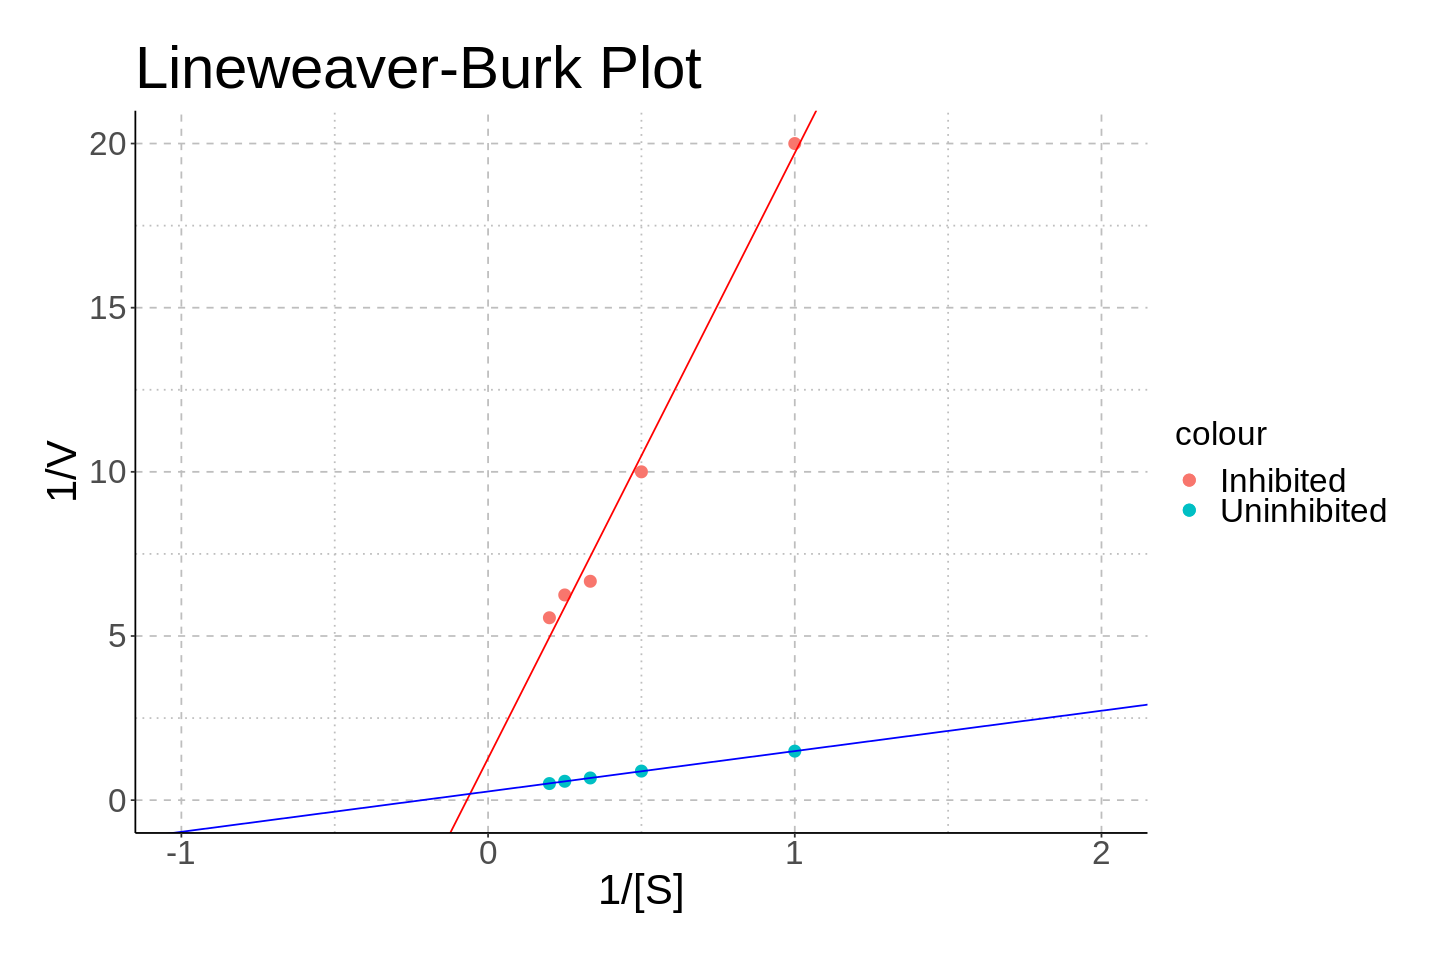

In [7]:
# Create Lineweaver-Burk plot two plots into one
fit <- lm(Rate ~ Substrate, data = inhibited_reciprocal)
slope <- summary(fit)$coefficients[2]
intercept <- summary(fit)$coefficients[1]

fit2 <- lm(Rate ~ Substrate, data = uninhibited_reciprocal)
slope2 <- summary(fit2)$coefficients[2]
intercept2 <- summary(fit2)$coefficients[1]


# plot the data into one plot using ggplot
ggplot() +
  geom_point(data = inhibited_reciprocal, aes(x = Substrate, y = Rate, color = "Inhibited"), size = 3) +
  geom_point(data = uninhibited_reciprocal, aes(x = Substrate, y = Rate, color = "Uninhibited"), size = 3) +
  geom_abline(intercept = intercept, slope = slope, color = "red") +
  geom_abline(intercept = intercept2, slope = slope2, color = "blue") +
  labs(x = "1/[S]", y = "1/V") +
  # title
  ggtitle("Lineweaver-Burk Plot") +
  # add legend
  labs(fill = "Legend") +
  theme_classic() +
  # want x axis to start at -5
  scale_x_continuous(limits = c(-1, 2)) +
  scale_y_continuous(limits = c(0, 20)) +
  theme(panel.grid.major = element_line(color = "gray", linetype = "dashed"),
        panel.grid.minor = element_line(color = "gray", linetype = "dotted"),
        axis.title.x = element_text(size = 25),
        axis.title.y = element_text(size = 25),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        title = element_text(size = 30),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 20)) +
  theme(plot.margin = unit(c(1,1,1,1), "cm"))


In [8]:
ggsave("plots/Lineweaver-Burk_big.png", width = 16, height = 12, units = "in", dpi = 300)

In [9]:
# Create a model nls using Michaelis-Menten uninhibited
model_uninh <- nls(
  Rate ~ Vm*Substrate/(Km+Substrate),
  data = uninhibited,
  start = list(Vm = 1, Km = 1.75) # 1. 1.75
)

# Print the model summary
cat("\nModel summary without inhibitor:")
summary(model_uninh)

cat("**********************************************************")
# Create a model nls using Michaelis-Menten inh
model_inh <- nls(
  Rate ~ Vm*Substrate/(Km+Substrate),
  data = inhibited,
  start = list(Vm = 0.1, Km = 1.75) # 0.1, 1.75
)
# Print the model summary
cat("\nModel summary with inhibitor:")
summary(model_inh)


Model summary without inhibitor:


Formula: Rate ~ Vm * Substrate/(Km + Substrate)

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
Vm  3.89228    0.08466   45.98 2.27e-05 ***
Km  4.88172    0.18287   26.70 0.000115 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01081 on 3 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.244e-07


**********************************************************
Model summary with inhibitor:


Formula: Rate ~ Vm * Substrate/(Km + Substrate)

Parameters:
   Estimate Std. Error t value Pr(>|t|)  
Vm  0.39455    0.09747   4.048   0.0272 *
Km  5.71258    2.29815   2.486   0.0888 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0101 on 3 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 2.365e-06


In [10]:
# convert the table to LaTeX
kable(summary(model_uninh)$coefficients, caption = "Model summary without inhibitor", format = "latex")
kable(summary(model_inh)$coefficients, caption = "Model summary with inhibitor", format = "latex")


\begin{table}

\caption{Model summary without inhibitor}
\centering
\begin{tabular}[t]{l|r|r|r|r}
\hline
  & Estimate & Std. Error & t value & Pr(>|t|)\\
\hline
Vm & 3.892276 & 0.0846582 & 45.97636 & 0.0000227\\
\hline
Km & 4.881717 & 0.1828702 & 26.69498 & 0.0001153\\
\hline
\end{tabular}
\end{table}

\begin{table}

\caption{Model summary with inhibitor}
\centering
\begin{tabular}[t]{l|r|r|r|r}
\hline
  & Estimate & Std. Error & t value & Pr(>|t|)\\
\hline
Vm & 0.3945486 & 0.0974731 & 4.047768 & 0.0271504\\
\hline
Km & 5.7125837 & 2.2981512 & 2.485730 & 0.0888186\\
\hline
\end{tabular}
\end{table}

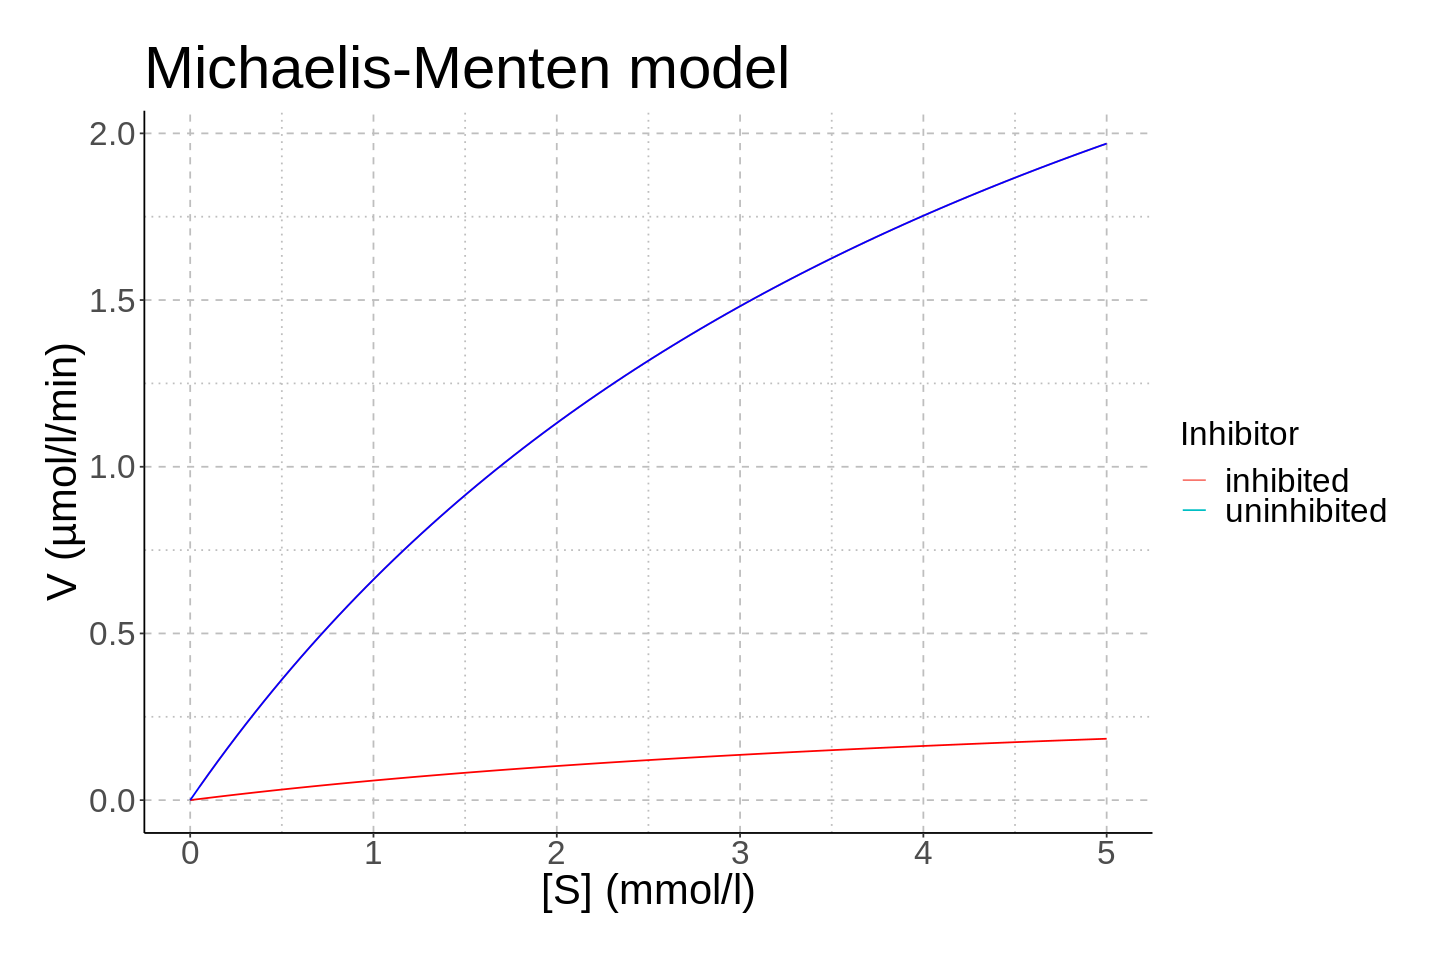

In [11]:
# Visualize the model
options(repr.plot.width=12, repr.plot.height=8)

# Define the data
Vmax_uninhibited <- coef(model_uninh)[1]
Km_uninhibited <- coef(model_uninh)[2]
Vmax_inhibited <- coef(model_inh)[1]
Km_inhibited <- coef(model_inh)[2]


# Create substrate concentration range
Substrate <- seq(0, 5, length.out = 100)
reaction_rate_uninhibited <- 0
reaction_rate_inhibited <- 0

# Calculate reaction rates without inhibitor and with inhibitor
reaction_rate_uninhibited <- Vmax_uninhibited*Substrate/(Km_uninhibited+Substrate)
reaction_rate_inhibited <- Vmax_inhibited*Substrate/(Km_inhibited+Substrate)

# create data frame with the data
data_pred <- data.frame(Substrate, reaction_rate_uninhibited, reaction_rate_inhibited)

# add inhibitor and set to 0 for uninhibited and 1 for inhibited
data_pred$Inhibitor <- "uninhibited"
data_pred$Inhibitor[Substrate != 0] <- "inhibited"


# Plot the data and the fits
ggplot(data_pred, aes(x = Substrate, y = reaction_rate_uninhibited, color = factor(Inhibitor))) +
  geom_line() +
  geom_line(aes(y = reaction_rate_inhibited), color = "red") +
  geom_line(aes(y = reaction_rate_uninhibited), color = "blue") +
  ggtitle("Michaelis-Menten model") +
  scale_color_discrete(name = "Inhibitor") +
  labs(x = "[S] (mmol/l)", y = "V (µmol/l/min)") +
  theme_classic() +
  theme(panel.grid.major = element_line(color = "gray", linetype = "dashed"),
        panel.grid.minor = element_line(color = "gray", linetype = "dotted"),
        axis.title.x = element_text(size = 25),
        axis.title.y = element_text(size = 25),
        axis.text.x = element_text(size = 20),
        axis.text.y = element_text(size = 20),
        title = element_text(size = 30),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 20)) +
  theme(plot.margin = unit(c(1,1,1,1), "cm"))



In [12]:
ggsave("plots/model_fit_plot2.png", width = 16, height = 12, units = "in", dpi = 300)

In [13]:
# Print Vm and Km with std. error for inh and uninh
cat("\nVm and Km with std.error for inhibited and uninhibited reactions:\n")

Vm_inh <- summary(model_inh)$coefficients[1]
Km_inh <- summary(model_inh)$coefficients[2]
Vm_uninh <- summary(model_uninh)$coefficients[1]
Km_uninh <- summary(model_uninh)$coefficients[2]

# standard err of Km and Vm
Vm_inh_sd <- summary(model_inh)$coefficients[3]
Km_inh_sd <- summary(model_inh)$coefficients[4]
Vm_uninh_sd <- summary(model_uninh)$coefficients[3]
Km_uninh_sd <- summary(model_uninh)$coefficients[4]

cat("Vm_uninhibited", format(round(Vm_uninh, 2), nsmall = 2), "±", format(round(Vm_uninh_sd, 2), nsmall = 2), "\n")
cat("Km_uninhibited", format(round(Km_uninh, 2), nsmall = 2), "±", format(round(Km_uninh_sd, 2), nsmall = 2), "\n")
cat("Vm_inhibited", format(round(Vm_inh, 2), nsmall = 2), "±", format(round(Vm_inh_sd, 2), nsmall = 2), "\n")
cat("Km_inhibited", format(round(Km_inh, 2), nsmall = 2), "±", format(round(Km_inh_sd, 2), nsmall = 2), "\n")

stderr_upper <- c(Vm_uninh + Vm_uninh_sd, Km_uninh + Km_uninh_sd, Vm_inh + Vm_inh_sd, Km_inh + Km_inh_sd)
stderr_lower <- c(Vm_uninh - Vm_uninh_sd, Km_uninh - Km_uninh_sd, Vm_inh - Vm_inh_sd, Km_inh - Km_inh_sd)



Vm and Km with std.error for inhibited and uninhibited reactions:
Vm_uninhibited 3.89 ± 0.08 
Km_uninhibited 4.88 ± 0.18 
Vm_inhibited 0.39 ± 0.10 
Km_inhibited 5.71 ± 2.30 


In [14]:

# non competitive inhibition Ki = 1

noncomfit <- nls(
  Rate ~ Vm*Substrate/((Km+Substrate)*(1+Inhibitor/Ki)),
  data = data,
  start = list(Vm = Vm_inh, Km = Km_inh, Ki = 0.5)
)

# Print the model summary
cat("\nModel summary with inhibitor:\n")
summary(noncomfit)



Model summary with inhibitor:



Formula: Rate ~ Vm * Substrate/((Km + Substrate) * (1 + Inhibitor/Ki))

Parameters:
   Estimate Std. Error t value Pr(>|t|)    
Vm 3.895512   0.076706   50.78 3.01e-10 ***
Km 4.888788   0.165690   29.51 1.32e-08 ***
Ki 0.101760   0.003631   28.02 1.89e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009818 on 7 degrees of freedom

Number of iterations to convergence: 6 
Achieved convergence tolerance: 8.548e-06


In [15]:
# convert the table to LaTeX
kable(summary(noncomfit)$coefficients, caption = "Model summary with inhibitor", format = "latex")


\begin{table}

\caption{Model summary with inhibitor}
\centering
\begin{tabular}[t]{l|r|r|r|r}
\hline
  & Estimate & Std. Error & t value & Pr(>|t|)\\
\hline
Vm & 3.8955119 & 0.0767059 & 50.78504 & 0\\
\hline
Km & 4.8887879 & 0.1656901 & 29.50562 & 0\\
\hline
Ki & 0.1017605 & 0.0036314 & 28.02254 & 0\\
\hline
\end{tabular}
\end{table}

In [16]:
confint(noncomfit)

stderr_noncomfit <- summary(noncomfit)$coefficients[3,2]
cat("Ki with std.error for non competitive inhibition:\n")
cat("Ki", format(round(coef(noncomfit)[3], 2), nsmall = 2), "±", format(round(stderr_noncomfit, 2), nsmall = 2), "\n")

cat("Vm and Km with std.error for non competitive inhibition:\n")
cat("Vm", format(round(coef(noncomfit)[1], 2), nsmall = 2), "±", format(round(summary(noncomfit)$coefficients[1,2], 2), nsmall = 2), "\n")
cat("Km", format(round(coef(noncomfit)[2], 2), nsmall = 2), "±", format(round(summary(noncomfit)$coefficients[2,2], 2), nsmall = 2), "\n")


Waiting for profiling to be done...



,2.5%,97.5%
Vm,3.72224697,4.0877450
Km,4.51555941,5.3052748
Ki,0.09324541,0.1104207


Ki with std.error for non competitive inhibition:
Ki 0.10 ± 0.00 
Vm and Km with std.error for non competitive inhibition:
Vm 3.90 ± 0.08 
Km 4.89 ± 0.17 


In [17]:
# confidence interval for Ki in LaTeX
kable(confint(noncomfit), caption = "Confidence interval for Ki", format = "latex")

Waiting for profiling to be done...



\begin{table}

\caption{Confidence interval for Ki}
\centering
\begin{tabular}[t]{l|r|r}
\hline
  & 2.5\% & 97.5\%\\
\hline
Vm & 3.7222470 & 4.0877450\\
\hline
Km & 4.5155594 & 5.3052748\\
\hline
Ki & 0.0932454 & 0.1104207\\
\hline
\end{tabular}
\end{table}

In [18]:
# Calculate the confidence intervals
ci_uninh <- confint(model_uninh)
ci_inh <- confint(model_inh)
ci_uninh
ci_inh
cat("\nConfidence intervals:\n")

# calculate the 95% confidence intervals for Km and Vmax round to 2 decimal places
cat("\nVmax_uninh = ", round(ci_uninh[1,1],2), " - ", round(ci_uninh[1,2],2))
cat("\nKm_uninh = ", round(ci_uninh[2,1],2), " - ", round(ci_uninh[2,2],2))
cat("\nVmax_inh = ", round(ci_inh[1,1],2), " - ", round(ci_inh[1,2],2))
cat("\nKm_inh = ", round(ci_inh[2,1],2), " - ", round(ci_inh[2,2],2))

Waiting for profiling to be done...

Waiting for profiling to be done...



,2.5%,97.5%
Vm,3.640811,4.185819
Km,4.340821,5.518560


,2.5%,97.5%
Vm,0.2437008,3.270303
Km,2.5583905,74.920215



Confidence intervals:

Vmax_uninh =  3.64  -  4.19
Km_uninh =  4.34  -  5.52
Vmax_inh =  0.24  -  3.27
Km_inh =  2.56  -  74.92

In [19]:
# CI in LaTeX
kable(ci_uninh, caption = "Confidence interval for Vm and Km for uninhibited reaction", format = "latex")
kable(ci_inh, caption = "Confidence interval for Vm and Km for inhibited reaction", format = "latex")



\begin{table}

\caption{Confidence interval for Vm and Km for uninhibited reaction}
\centering
\begin{tabular}[t]{l|r|r}
\hline
  & 2.5\% & 97.5\%\\
\hline
Vm & 3.640811 & 4.185819\\
\hline
Km & 4.340821 & 5.518560\\
\hline
\end{tabular}
\end{table}

\begin{table}

\caption{Confidence interval for Vm and Km for inhibited reaction}
\centering
\begin{tabular}[t]{l|r|r}
\hline
  & 2.5\% & 97.5\%\\
\hline
Vm & 0.2437008 & 3.270303\\
\hline
Km & 2.5583905 & 74.920215\\
\hline
\end{tabular}
\end{table}

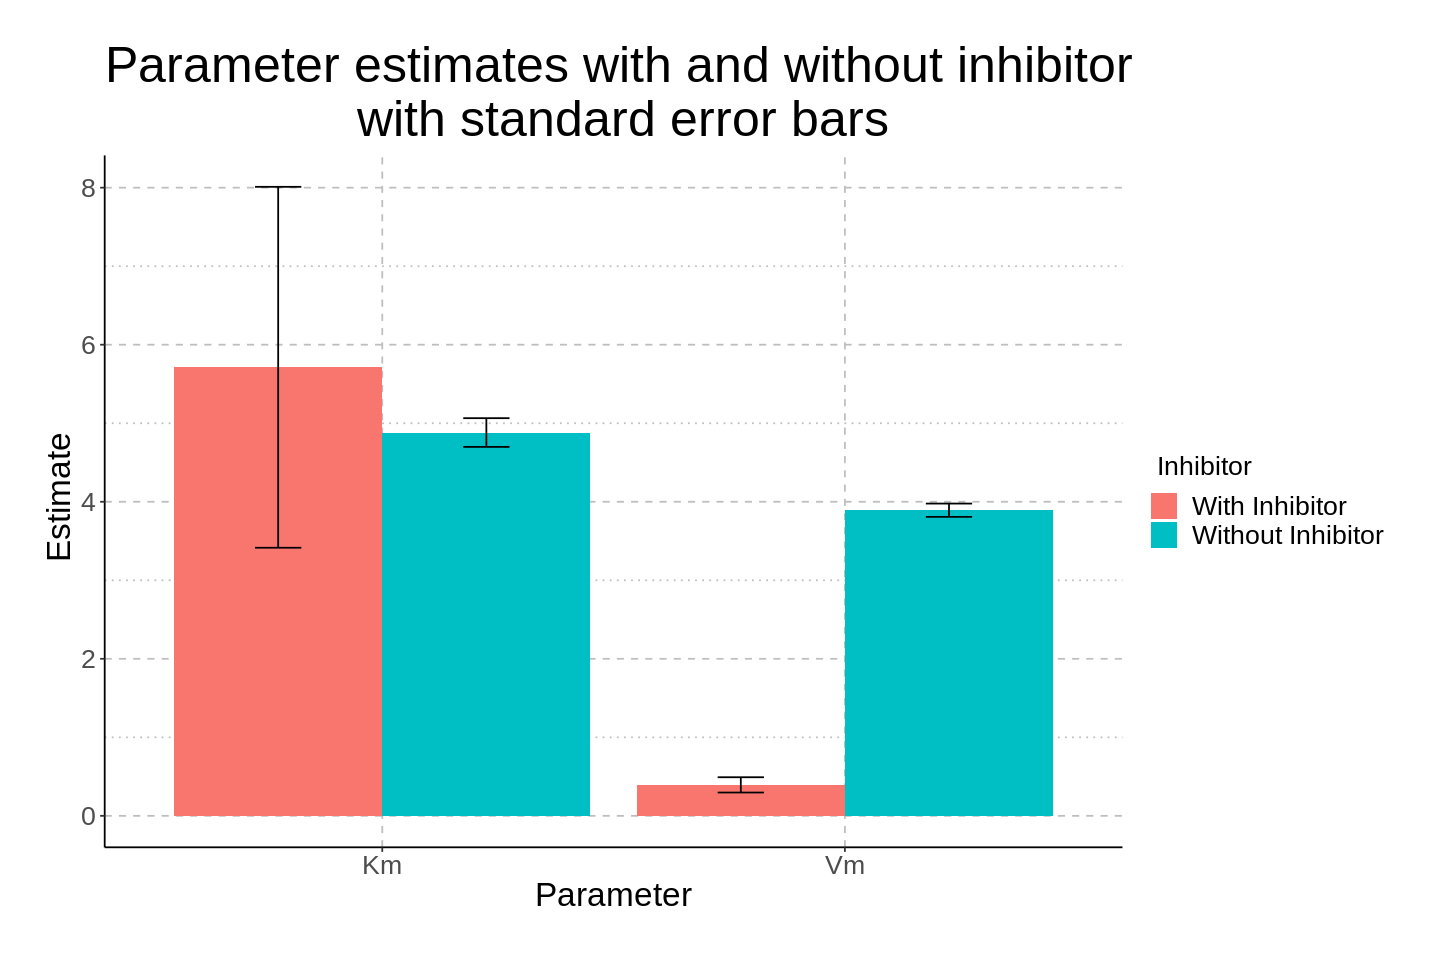

In [20]:


# create a data frame with the summary information
df <- data.frame( Parameter = c("Vm",  "Km", "Vm", "Km"),
                 Inhibitor  = c("Without Inhibitor", "Without Inhibitor", "With Inhibitor", "With Inhibitor"),
                 Estimate = c(3.89, 4.88, 0.39 , 5.71),   
                 stderr_upper, stderr_lower)


options(repr.plot.width=12, repr.plot.height=8)     

ggplot(df, aes(x =   Parameter, y = Estimate, fill = Inhibitor)) +     
      geom_bar(stat = "identity", position = "dodge") +
      # add error bars
      geom_errorbar(aes(ymin = stderr_lower, ymax = stderr_upper), width = 0.2, position = position_dodge(0.9)) +
       
  labs(x = "Parameter", y = " Estimate", fill  = "Inhibitor") +  
  ggtitle("Parameter estimates with and without inhibitor \n                  with standard error bars") +
  scale_fill_discrete(name = " Inhibitor") +
  theme_classic() +
  theme(panel.grid.major = element_line(color = "gray", linetype = "dashed"),
        panel.grid.minor = element_line(color = "gray", linetype = "dotted"),
        axis.title.x =  element_text(size = 20),
        axis.title.y = element_text(size = 20), 
        axis.text.x  = element_text(size = 16),   
        axis.text.y = element_text(size = 16), 
        plot.title = element_text(size = 30), 
        legend.text  = element_text(size = 16),
        legend.title  = element_text(size = 16)) +   
  theme(plot.margin = unit(c(1,1,1,1), "cm")) 


In [21]:
# save the plot
ggsave("plots/enzyme_hw_plot3.png", width = 16, height = 12, units = "in", dpi = 300)

